In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{border: 1px 
black solid ! important;color:black !important;}
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd;import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%%file adn.csv
ADN ,A,T,C,G,U,SMILES
Adenine,5,6,5,5,4,C1=NC2=NC=NC(=C2N1)
Thymine,0,2,1,1,2,CC1=CNC(=O)NC1=O
Cystine,5,2,3,5,2,C1=NC2=NC=NC(=C2N1)N
Guanine,5,5,4,5,4,C1=NC2=C(N1)C(=O)NC(=N2)N
Uracil,2,2,4,0,0,C1=CNC(=O)NC1=O

Overwriting adn.csv


In [4]:
pd.read_csv('adn.csv')

,ADN,A,T,C,G,U,SMILES
0,Adenine,5,6,5,5,4,C1=NC2=NC=NC(=C2N1)
1,Thymine,0,2,1,1,2,CC1=CNC(=O)NC1=O
2,Cystine,5,2,3,5,2,C1=NC2=NC=NC(=C2N1)N
3,Guanine,5,5,4,5,4,C1=NC2=C(N1)C(=O)NC(=N2)N
4,Uracil,2,2,4,0,0,C1=CNC(=O)NC1=O


In [5]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [6]:
A=Chem.MolFromSmiles("C1=NC2=NC=NC(=C2N1)N")
T=Chem.MolFromSmiles("CC1=CNC(=O)NC1=O")
C=Chem.MolFromSmiles("C1=C(NC(=O)N=C1)N")
G=Chem.MolFromSmiles("C1=NC2=C(N1)C(=O)NC(=N2)N")

In [7]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

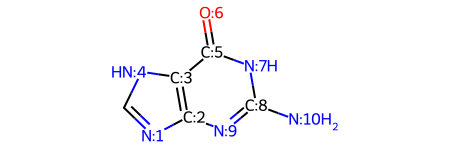

In [8]:
mol_with_atom_index(A);mol_with_atom_index(T)
mol_with_atom_index(C);mol_with_atom_index(G)

In [9]:
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

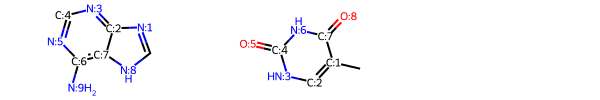

In [10]:
Draw.MolsToGridImage((A,T), subImgSize=(200,100))

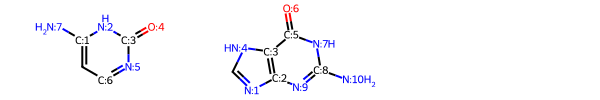

In [11]:
Draw.MolsToGridImage((C,G), subImgSize=(200,100))

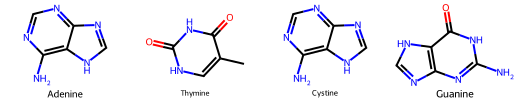

In [12]:
grid=[Chem.MolFromSmiles(x) for x in (
"C1=NC2=NC=NC(=C2N1)N","CC1=CNC(=O)NC1=O",
"C1=NC2=NC=NC(=C2N1)N","C1=NC2=C(N1)C(=O)NC(=N2)N")]
Draw.MolsToGridImage(grid,legends=("Adenine","Thymine",
"Cystine","Guanine"),molsPerRow=4,subImgSize=(130,100))

In [13]:
#url = "https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv"
!wget https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv

--2022-10-28 19:41:53--  https://raw.githubusercontent.com/XinhaoLi74/molds/master/clean_data/ESOL.csv
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 33632 (33K) [text/plain]
Enregistre : ‘ESOL.csv.12’

ESOL.csv.12         100%[===================>]  32,84K  --.-KB/s    ds 0,002s  

2022-10-28 19:41:54 (16,4 MB/s) - ‘ESOL.csv.12’ enregistré [33632/33632]



In [14]:
url="ESOL.csv"
esol_data = pd.read_csv(url);esol_data.head(1)

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77


In [15]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')
esol_data.head(1)

,smiles,logSolubility,ROMol
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77,<rdkit.Chem.rdchem.Mol object at 0x7f4e50b209a0>


In [16]:
esol_data["n_Atoms"] = esol_data['ROMol'].map(lambda x: x.GetNumAtoms())
#esol_data.head(1)

In [17]:
!cp sol.csv ESOL.csv

In [18]:
!ls 

adn.csv			  ESOL.csv.7
drugcentral_filtered.tsv  ESOL.csv.8
ESOL.csv		  ESOL.csv.9
ESOL.csv.1		  flitre-adn-hetam-pandas-rdkit.ipynb
ESOL.csv.10		  mols2grid-adn-pandas.ipynb
ESOL.csv.11		  molsgrid3d.ipynb
ESOL.csv.12		  out.csv
ESOL.csv.2		  sol.csv
ESOL.csv.3		  solubility.test.sdf
ESOL.csv.4		  solubility.test.sdf.1
ESOL.csv.5		  solubility.test.sdf.2
ESOL.csv.6


In [19]:
!grep -v "^#" adn.csv

ADN ,A,T,C,G,U,SMILES
Adenine,5,6,5,5,4,C1=NC2=NC=NC(=C2N1)
Thymine,0,2,1,1,2,CC1=CNC(=O)NC1=O
Cystine,5,2,3,5,2,C1=NC2=NC=NC(=C2N1)N
Guanine,5,5,4,5,4,C1=NC2=C(N1)C(=O)NC(=N2)N
Uracil,2,2,4,0,0,C1=CNC(=O)NC1=O


In [20]:
url="sol.csv"

In [21]:
#!grep -v "^#" ESOL.csv

In [22]:
url="sol.csv"
esol_data = pd.read_csv(url);esol_data.head(1)

,smiles,logSolubility
0,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,-0.77


In [23]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='smiles')


In [24]:
import mols2grid;import pandas as pd
from rdkit import Chem;from rdkit.Chem import Descriptors, Draw
from ipywidgets import interact, widgets
import urllib;from IPython.display import display;import py3Dmol

In [25]:
# read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/cbouy/UGM_2021/main/Notebooks/data/drugcentral_filtered.tsv", sep="\t")
df["mol"] = df["SMILES"].apply(Chem.MolFromSmiles)
# compute some descriptors
df["MolWt"] = df["mol"].apply(Descriptors.ExactMolWt)
df["LogP"] = df["mol"].apply(Descriptors.MolLogP)
df["NumHDonors"] = df["mol"].apply(Descriptors.NumHDonors)
df["NumHAcceptors"] = df["mol"].apply(Descriptors.NumHAcceptors)
# reformat the dataframe
df.drop(columns=["mol"], inplace=True)
df.rename(columns={"INN": "Name", "CAS_RN": "CAS"}, inplace=True)
print(f"{len(df)} molecules read")
df.head(2)

200 molecules read


,SMILES,InChI,InChIKey,ID,Name,CAS,MolWt,LogP,NumHDonors,NumHAcceptors
0,CCCCN1CCCC[C@H]1C(=O)NC1=C(C)C=CC=C1C,InChI=1S/C18H28N2O/c1-4-5-12-20-13-7-6-11-16(2...,LEBVLXFERQHONN-INIZCTEOSA-N,4,levobupivacaine,27262-47-1,288.220164,3.89654,1,2
1,COC(=O)C1=C(C)NC(C)=C([C@H]1C1=CC(=CC=C1)[N+](...,InChI=1S/C26H29N3O6/c1-17-22(25(30)34-4)24(20-...,ZBBHBTPTTSWHBA-DEOSSOPVSA-N,5,(S)-nicardipine,76093-36-2,479.205636,3.67780,1,8


In [26]:
mols2grid.display(df,
    subset=["ID", "img", "CAS"],
    # set the fields displayed on mouse hover
    tooltip=["Name", "MolWt"],
)

MolGridWidget()

In [27]:
#!wget https://raw.githubusercontent.com/cbouy/UGM_2021/main/Notebooks/data/drugcentral_filtered.tsv

In [28]:
df=pd.read_csv("adn.csv");df

,ADN,A,T,C,G,U,SMILES
0,Adenine,5,6,5,5,4,C1=NC2=NC=NC(=C2N1)
1,Thymine,0,2,1,1,2,CC1=CNC(=O)NC1=O
2,Cystine,5,2,3,5,2,C1=NC2=NC=NC(=C2N1)N
3,Guanine,5,5,4,5,4,C1=NC2=C(N1)C(=O)NC(=N2)N
4,Uracil,2,2,4,0,0,C1=CNC(=O)NC1=O


In [29]:
A=Chem.MolFromSmiles("C1=NC2=NC=NC(=C2N1)N")
T=Chem.MolFromSmiles("CC1=CNC(=O)NC1=O")
C=Chem.MolFromSmiles("C1=NC2=NC=NC(=C2N1)N")
G=Chem.MolFromSmiles("C1=NC2=C(N1)C(=O)NC(=N2)N")
U=Chem.MolFromSmiles("C1=CNC(=O)NC1=O")

In [30]:
df=pd.read_csv("adn.csv");df

,ADN,A,T,C,G,U,SMILES
0,Adenine,5,6,5,5,4,C1=NC2=NC=NC(=C2N1)
1,Thymine,0,2,1,1,2,CC1=CNC(=O)NC1=O
2,Cystine,5,2,3,5,2,C1=NC2=NC=NC(=C2N1)N
3,Guanine,5,5,4,5,4,C1=NC2=C(N1)C(=O)NC(=N2)N
4,Uracil,2,2,4,0,0,C1=CNC(=O)NC1=O


In [31]:
#!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.test.sdf

In [32]:
mols2grid.display(df, adncol="ADN",smiles_col="SMILES")

MolGridWidget()

In [33]:
import mols2grid
from pathlib import Path
from rdkit import RDConfig
from ipywidgets import widgets
import urllib.request, urllib.parse
from urllib.error import HTTPError
from IPython.display import display
import py3Dmol
SDF_FILE = (f"{RDConfig.RDDocsDir}/Book/data/solubility.test.sdf"
            if Path(RDConfig.RDDocsDir).is_dir() else "solubility.test.sdf")

In [34]:
output = widgets.Output()
@output.capture(clear_output=True, wait=True)
def show_3d(data):
    """Query PubChem to download the SDFile with 3D coordinates and
    display the molecule with py3Dmol
    """
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{}/SDF?record_type=3d"
    smi = urllib.parse.quote(data["SMILES"])
    try:
        response = urllib.request.urlopen(url.format(smi))
    except HTTPError:
        print(f"Could not find corresponding match on PubChem")
        print(data["SMILES"])
    else:
        sdf = response.read().decode()
        view = py3Dmol.view(height=300, width=800)
        view.addModel(sdf, "sdf")
        view.setStyle({'stick': {}})
        view.zoomTo()
        view.show()

view = mols2grid.display(SDF_FILE, mol_col="mol",tooltip_trigger="hover",
callback=show_3d,);display(view);output

MolGridWidget()

Output()

In [35]:
js_callback = """
// remove image from data
delete data["img"];
// convert data object to text
txt = JSON.stringify(data);
// show data in alert window
alert(txt);
"""

mols2grid.display(
    SDF_FILE, mol_col="mol",
    tooltip_trigger="hover",
    callback=js_callback,
)


MolGridWidget()

In [36]:
df.iloc[list(mols2grid.get_selection().keys())]

,ADN,A,T,C,G,U,SMILES


In [37]:
mols2grid.display(df, adncol="ADN",smiles_col="SMILES")

MolGridWidget()

In [38]:
# load 3Dmol.js in header
custom_header = """
<script src="https://cdnjs.cloudflare.com/ajax/libs/3Dmol/1.8.0/3Dmol-nojquery-min.js" integrity="sha512-9iiTgstim185ZZPL/nZ+t+MLMmIbZEMfoZ1swSBUhxt4AukOPY34yyO2217X1dN5ziVMKi+YLmp/JBj+KyEaUQ==" crossorigin="anonymous" referrerpolicy="no-referrer"></script>
"""

viewer="""
setHoverable({},True,'''function(atom,viewer,event,container) {
                   if(!atom.label) {
                    atom.label = viewer.addLabel(atom.resn+":"+atom.atom,{position: atom, backgroundColor: 'mintcream', fontColor:'black'});
                   }}''',
               '''function(atom,viewer) { 
                   if(atom.label) {
                    viewer.removeLabel(atom.label);
                    delete atom.label;
                   }
                }''')
"""
js_callback = mols2grid.make_popup_callback(
    title="${data['NAME']}",
    js="""
    // prepare PubChem query to fetch 3D SDF from SMILES
    let base_url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/';
    let escaped_smi = encodeURIComponent(data['SMILES']);
    var sdf_url = base_url + escaped_smi + '/SDF?record_type=3d';   
    // fetch file and display with 3Dmol.js
    $(document).ready(function() {
        let element = $('#molviewer');
        let config = { backgroundColor: 'white' };
        let viewer = $3Dmol.createViewer(element, config);
        $.ajax(sdf_url, { 
            success: function(data) {
                viewer.addModel(data, df);
                viewer.setStyle({'stick': {'radius': .05},
                'sphere': {'scale': 0.25}});                              
                viewer.zoomTo();
                viewer.setHoverable({},1,function(atom,viewer,event,container) {
                   if(!atom.label) {
                    atom.label = viewer.addLabel(atom.serial+':'+atom.atom,{position: atom, backgroundColor: 'mintcream', fontColor:'black'});
                   }},
               function(atom,viewer) { 
                   if(atom.label) {
                    viewer.removeLabel(atom.label);
                    delete atom.label;
                   }
                });
                viewer.render();
                
            },
            error: function(hdr, status, err) {
                console.error("Failed to load SDF " + sdf_url + ": " + err);
            },
        });
    });
    
    """,
    html='<div id="molviewer" style="width: 100%; height: 350px;"></div>',
    style="max-width: 80%",
)

mols2grid.display(
    #SDF_FILE, mol_col="mol",
    df, adncol="ADN",smiles_col="SMILES",
    tooltip_trigger="hover",
    callback=js_callback,
    custom_header=custom_header,
    viewer=viewer)

MolGridWidget()